# FFT and sound

# 1. Reading Audio Files

LibROSA is a python library that has almost every utility you are going to need while working on audio data. What can we do?
1. Loading and displaying characteristics of an audio file.
2. Spectral representations
3. Feature extraction and Manipulation
4. Time-Frequency conversions
5. Temporal Segmentation
6. Sequential Modeling…etc

LibROSA supports lots of audio codecs. Although .wav(lossless) is widely used when audio data analysis is concerned.

<b>librosa.load()</b> —> function returns two things:
1. An array of amplitudes. 
2. Sampling rate. 

The sampling rate refers to ‘sampling frequency’ used while recording the audio file. If you keep the argument sr = None , it will load your audio file in its original sampling rate. (Note: You can specify your custom sampling rate as per your requirement, libROSA can upsample or downsample the signal for you).

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import librosa
ROOT_DIR = './drive/MyDrive/Colab Notebooks/COSC522/Assignment2/collected_data'
CLASS = 'microwave'

file_path = f"{ROOT_DIR}/{CLASS}/microwave_20221009_165812489.wav"
samples, sampling_rate = librosa.load(file_path, sr=None, mono=True, offset=0.0, duration=None)

print("-----------------")
print(f"Samples: {len(samples)}")
print(f"Sampling rate: {sampling_rate}")
print("-----------------")

-----------------
Samples: 2036817
Sampling rate: 44100
-----------------


sampling_rate = 16k says that this audio was recorded(sampled) with a sampling frequency of 16k. In other words, while recording this file we were capturing 16000 amplitudes every second. Thus, If we want to know the duration of the audio, we can simply divide the number of samples (amplitudes) by the sampling-rate as shown below:

In [11]:
duration_of_sound = len(samples) / sampling_rate
print(duration_of_sound, "seconds")

46.18632653061224 seconds


### Play the sound inside a notebook (useful for coding)

In [12]:
from IPython.display import Audio
Audio(file_path)

Output hidden; open in https://colab.research.google.com to view.

### Visualizing Audio

We have got amplitudes and sampling-rate from librosa. We can easily plot these amplitudes with time. LibROSA provides a utility function waveplot() as shown below:

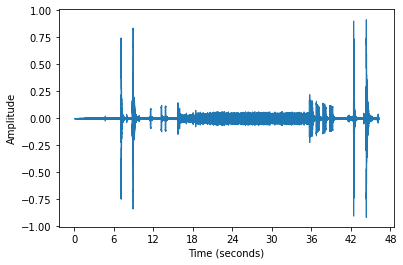

In [13]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure()
librosa.display.waveshow(samples, sr=sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

This visualization is called the time-domain representation of a given signal. This shows us the loudness (amplitude) of sound wave changing with time. Here amplitude = 0 represents silence.

These amplitudes are not very informative, as they only talk about the loudness of audio recording. To better understand the audio signal, it is necessary to transform it into the frequency-domain. The frequency-domain representation of a signal tells us what different frequencies are present in the signal. Fourier Transform is a mathematical concept that can convert a continuous signal from time-domain to frequency-domain.

# 2. Fourier Transform (FT)

An audio signal is a complex signal composed of multiple ‘single-frequency sound waves’ which travel together as a disturbance(pressure-change) in the medium. When sound is recorded we only capture the resultant amplitudes of those multiple waves. <b>Fourier Transform</b> is a mathematical concept that can decompose a signal into its constituent frequencies. 

Fourier transform does not just give the <b>frequencies</b> present in the signal, It also gives the <b>magnitude of each frequency</b> present in the signal.

<img src="imgs/fft_1.gif" width="600">

<b>Inverse Fourier Transform</b> is just the opposite of the Fourier Transform. It takes the frequency-domain representation of a given signal as input and does mathematically synthesize the original signal.

# 3. Fast Fourier Transform (FFT)

Fast Fourier Transformation(FFT) is a mathematical algorithm that calculates <b>Discrete Fourier Transform (DFT)</b> of a given sequence. 

The only difference between FT(Fourier Transform) and FFT is that FT considers a continuous signal while FFT takes a discrete signal as input. DFT converts a sequence (discrete signal) into its frequency constituents just like FT does for a continuous signal. In our case, we have a sequence of amplitudes that were sampled from a continuous audio signal. <b>DFT</b> or <b>FFT</b> algorithm can convert this time-domain discrete signal into a frequency-domain.

### Simple Sine Wave to Understand FFT

To understand the output of FFT, let’s create a simple sine wave. The following piece of code creates a sine wave with a sampling rate=100, amplitude=1 and frequency=3. Amplitude values are calculated every 1/100th second (sampling rate) and stored into a list called y1. We will pass these discrete amplitude values to calculate DFT of this signal using the FFT algorithm.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 100
f = 3
x = np.arange(sampling_rate) #[ 0  1  2  3  4  5  6  7 ... 98 99]
y1 = np.sin(2*np.pi*f*(x/sampling_rate)) #sine function

If you plot these discrete values(y1) keeping sample number on x-axis and amplitude value on y-axis, it generates a nice sine wave plot as the following figure:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


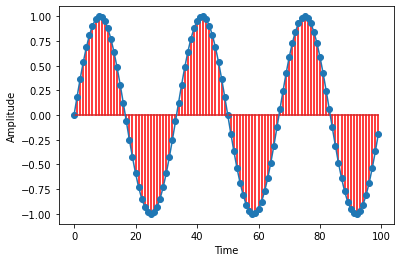

In [15]:
plt.figure()
plt.stem(x,y1,'r')
plt.plot(x,y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Now we have a sequence of amplitudes stored in list y1. We will pass this sequence to the FFT algorithm implemented by scipy. This algorithm returns a list yf of complex-valued amplitudes of the frequencies found in the signal. 

The first half of this list returns positive-frequency-terms, and the other half returns negative-frequency-terms which are similar to the positive ones. You can pick out any one half and calculate absolute values to represent the frequencies present in the signal. Following function takes samples as input and plots the frequency graph

In [16]:
from scipy.fftpack import fft

def fft_method(audio, sampling_rate):
    # variables
    T = 1/sampling_rate
    N = len(audio)
    max_val = 1.0/(2.0*T) # max frequency spectrum of the FFT.
    num_vals = N//2  
    
    # calculate fft
    yf_all = fft(audio)
    
    xf = np.linspace(0.0, max_val, num_vals)
    yf = 2.0/N * np.abs(yf_all[0:num_vals])
    
    return xf, yf

In the following graph, we have plotted the frequencies for our sine wave using the above fft_plot function. You can see this plot clearly shows the single frequency value present in our sine wave, which is 3. Also, it shows amplitude related to this frequency which we kept 1 for our sine wave.

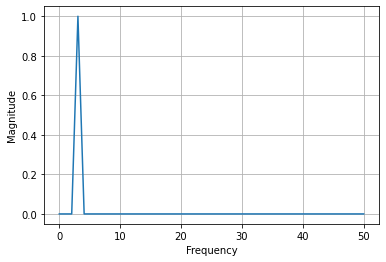

In [17]:
xf, yf = fft_method(y1, sampling_rate)

fig, ax = plt.subplots()
ax.plot(xf, yf)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Let's create another example

To check out the output of FFT for a signal having more than one frequency, Let’s create another sine wave. This time we will keep sampling rate = 100, amplitude = 2 and frequency value = 11. Following code generates this signal and plots the sine wave

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


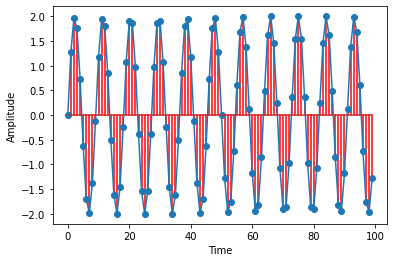

In [18]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 100
f = 11
x = np.arange(sampling_rate) #[ 0  1  2  3  4  5  6  7 ... 98 99]
y2 = 2 * np.sin(2*np.pi*f*(x/sampling_rate)) #sine function

plt.figure()
plt.stem(x,y2,'r')
plt.plot(x,y2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Let's plot the results again:

(Obviously FFT function will show a single spike with frequency = 11 for this wave.)

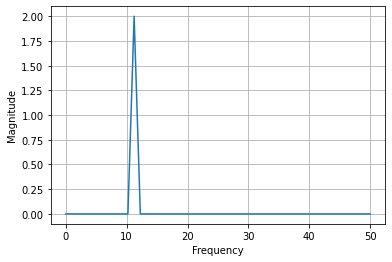

In [19]:
xf, yf = fft_method(y2, sampling_rate)

fig, ax = plt.subplots()
ax.plot(xf, yf)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### What if we combine the two created signals?

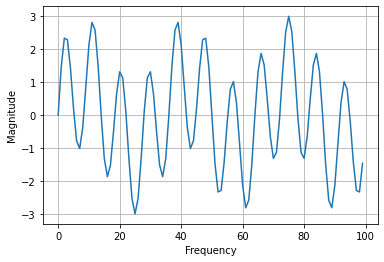

In [20]:
y3 = y1+y2

fig, ax = plt.subplots()
ax.plot(x, y3)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

If we pass this sequence (y3) to our fft_plot function. It generates the following frequency graph for us. It shows two spikes for the two frequencies present in our resultant signal. So the presence of one frequency does not affect the other frequency in the signal. Also, one thing to notice is that the magnitudes of the frequencies are in line with our generated sine waves.

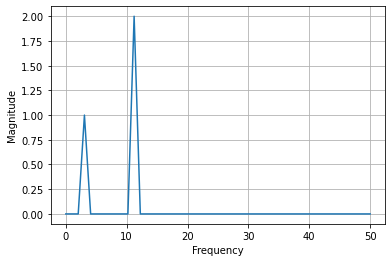

In [21]:
xf, yf = fft_method(y3, sampling_rate)

fig, ax = plt.subplots()
ax.plot(xf, yf)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### FFT on our Audio signal

Now that we have seen how this FFT algorithm gives us all the frequencies in a given signal. let’s try to pass our original audio signal into this function. We are using the same audio clip we loaded earlier into the python with a sampling rate = 16000.

In [22]:
from scipy.fftpack import fft

def fft_method(audio, sampling_rate):
    # variables
    T = 1/sampling_rate
    N = len(audio)
    max_val = 1.0/(2.0*T) # max frequency spectrum of the FFT.
    num_vals = N//2  
    
    # calculate fft
    yf_all = fft(audio)
    
    xf = np.linspace(0.0, max_val, num_vals)
    yf = 2.0/N * np.abs(yf_all[0:num_vals])
    
    return xf, yf

In [23]:
import librosa
# ROOT_DIR = './dataset/cats_dogs/'
# CSV_PATH = './dataset/train_test_split.csv'

# file_path = f"{ROOT_DIR}/train/dog/dog_barking_0.wav"
samples, sampling_rate = librosa.load(file_path, sr=None, mono=True, offset=0.0, duration=None)

len(samples), sampling_rate

(2036817, 44100)

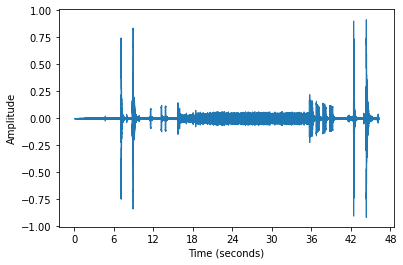

In [24]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure()
librosa.display.waveshow(samples, sr=sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

1018408
1018408
[0.00000000e+00 2.16514615e-02 4.33029231e-02 ... 2.20499567e+04
 2.20499783e+04 2.20500000e+04]


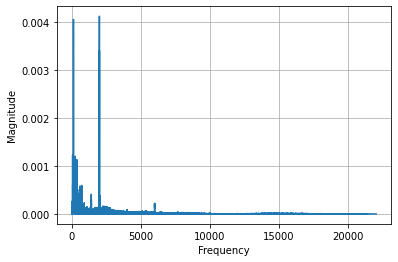

In [25]:
xf, yf = fft_method(samples, sampling_rate)
print(len(xf))
print(len(yf))
print(xf)

#fig, ax = plt.subplots()
plt.plot(xf, yf)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

Now, look at the following frequency plot. This ‘17-second long’ signal is composed of thousands of different frequencies. Magnitudes of frequency values > 3000 are very small as most of these frequencies are probably due to the noise. We are plotting frequencies ranging from 0 to 8kHz because our signal was sampled at 16k sampling rate and according to the Nyquist sampling theorem, it should only posses frequencies ≤ 8000Hz (16000/2).

<b>An important question is:</b>

We got frequencies, but, where is the Time information?

In [31]:
'''
Taken from article in Towards Data Science
https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

Citation if needed:
Chaudhary, K. (2020). Understanding audio data, fourier transform, fft and spectrogram features for a speech recognition system. Towards Data Science-Medium.

'''

def spectrogram(samples, sample_rate, stride_ms=10.0, window_ms=30.0,max_freq=10000000,eps=1e-14):
  stride_size= int(0.001 * sample_rate * stride_ms)
  window_size= int(0.001 * sample_rate * window_ms)

  #Extract the strided windows
  truncate_size = (len(samples) - window_size) % stride_size
  samples = samples[:len(samples) - truncate_size]
  nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
  nstrides = (samples.strides[0], samples.strides[0] * stride_size)
  windows = np.lib.stride_tricks.as_strided(samples, shape = nshape, strides = nstrides)


  # Window weighting, squared Fast Fourier Transform (fft), scaling
  weighting = np.hanning(window_size)[:, None]
  
  fft = np.fft.rfft(windows * weighting, axis=0)
  fft = np.absolute(fft)
  fft = fft**2
  
  scale = np.sum(weighting**2) * sample_rate
  fft[1:-1, :] *= (2.0 / scale)
  fft[(0, -1), :] /= scale
  
  # Prepare fft frequency list
  freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
  
  # Compute spectrogram feature
  ind = np.where(freqs <= max_freq)[0][-1] + 1
  spect_gram = np.log(fft[:ind, :] + eps)
  return spect_gram


In [32]:
spectro=spectrogram(samples, sampling_rate)
print(spectro.shape)

(662, 4616)


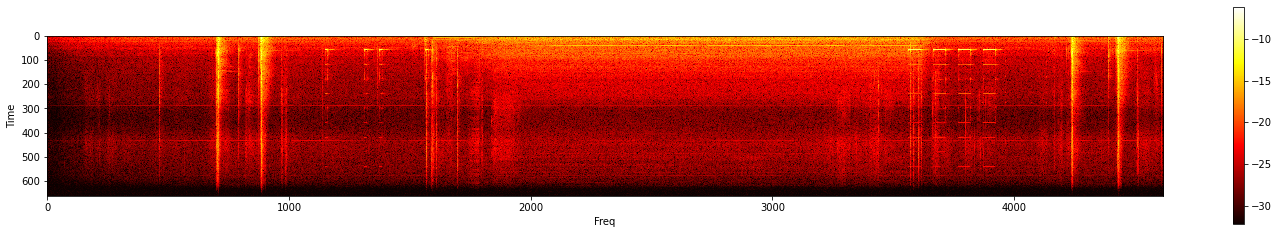

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,4))

plt.imshow(spectro, cmap='hot', interpolation='nearest')
plt.xlabel("Freq")
plt.ylabel("Time")
plt.colorbar()
plt.show()

In [34]:
spectro

array([[-26.97511162, -24.57347658, -23.6804517 , ..., -21.97112685,
        -27.34346606, -22.5737324 ],
       [-21.54018327, -20.72365775, -21.88770762, ..., -19.55762318,
        -18.95450539, -18.04613468],
       [-20.01334821, -19.57453885, -21.00416815, ..., -18.7866488 ,
        -18.14913498, -17.9568653 ],
       ...,
       [-31.89401649, -32.01653215, -32.1294646 , ..., -32.06465201,
        -31.83350933, -31.75586956],
       [-31.63520871, -32.12249978, -32.02853554, ..., -32.05413803,
        -31.90671294, -32.10344933],
       [-32.13407086, -32.14927509, -32.09169326, ..., -32.1135907 ,
        -31.98416584, -32.04110489]])